## CSCI 183 Data Science
### Spam Filtering for Short Messages: Visualizations
#### Ryan Johnson, Grace Nguyen, and Raya Young




In [22]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud

#### Import the test data 
Separate into two arrays: spam and ham. These arrays will be processed individually in order to generate word clouds.

In [7]:
spam = list()
ham = list()
with open('SMSSpamCorpus01/english_big.txt', 'r', errors='ignore') as file:
    lines = file.readlines()
    for l in lines:
        words = l.split(",")
        message = ""
        for w in words:
            if w == 'ham\n':
                ham.append(message) 
            elif w == 'spam\n':
                spam.append(message)
            else:
                message = message + w

#### Sample of Spam messages

In [8]:
df = pd.DataFrame({'Messages': spam})
df.head()

,Messages
0,Urgent! call 09061749602 from Landline. Your c...
1,+449071512431 URGENT! This is the 2nd attempt ...
2,FREE for 1st week! No1 Nokia tone 4 ur mob eve...
3,Urgent! call 09066612661 from landline. Your c...
4,WINNER!! As a valued network customer you have...


#### Sample of Ham messages

In [9]:
df2 = pd.DataFrame({'Messages': ham})
df2.head()

,Messages
0,"""Hey sorry I didntgive ya a a bellearlier hunn..."
1,"""Are you comingdown later?"""
2,"""HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR..."
3,"""CHA QUITEAMUZING THATSCOOL BABEPROBPOP IN & C..."
4,"""HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE..."


#### Converting to lowercase

In [10]:
spam = [word.lower() for word in spam]
ham = [word.lower() for word in ham]

#### Stopword removal and Stemming
Clean both sets of data by removing stopwords. This way, the word cloud will not be completely populated by common stop words. Stemming is also important to ensure eliminate the possibility of having multiple different forms of words.

Spam:

In [18]:
stop = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
filtered = ""
clean_spam = ""
for message in spam:
    sentence = message.split(" ")
    for word in sentence:
        if word.lower() not in stop:
            stemmed = stemmer.stem(word)
            filtered = filtered + " " + stemmed
    clean_spam = clean_spam + " " + filtered
    filtered = ""

Ham:

In [19]:
clean_ham = ""
for message in ham:
    sentence = message.split(" ")
    for word in sentence:
        if word.lower() not in stop:
            stemmed = stemmer.stem(word)
            filtered = filtered + " " + stemmed
    clean_ham = clean_ham + " " + filtered
    filtered = ""

#### Creating Word Cloud
Spam:

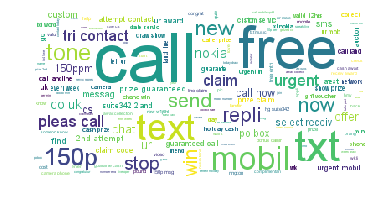

In [38]:
wordcloud = WordCloud(font_path='/Library/Fonts/Arial.ttf',
                      relative_scaling = 1.0,
                      background_color = "white",
                      ).generate(clean_spam)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Ham:

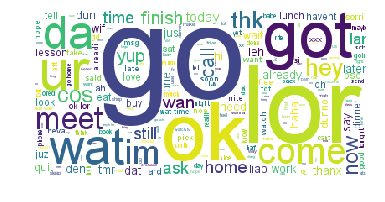

In [39]:
wordcloud = WordCloud(font_path='/Library/Fonts/Arial.ttf',
                      relative_scaling = 1.0,
                      background_color = "white",
                      ).generate(clean_ham)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()